In [166]:
import pandas as pd
import numpy as np
from fbprophet import Prophet




In [167]:
df = pd.read_csv('population_data.csv')

In [168]:
df.head()

,Country or Area,Year,Area,Sex,Age,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Argentina,2017,Total,Both Sexes,Total,Estimate - de facto,"Final figure, complete",2017.0,44044811.0,1
1,Argentina,2017,Total,Both Sexes,0 - 4,Estimate - de facto,"Final figure, complete",2017.0,3748846.0,1
2,Argentina,2017,Total,Both Sexes,9-May,Estimate - de facto,"Final figure, complete",2017.0,3669575.0,1
3,Argentina,2017,Total,Both Sexes,14-Oct,Estimate - de facto,"Final figure, complete",2017.0,3513167.0,1
4,Argentina,2017,Total,Both Sexes,15 - 19,Estimate - de facto,"Final figure, complete",2017.0,3519280.0,1


In [169]:
df.drop(['Area', 'Sex', 'Record Type', 'Reliability', 'Source Year', 'Value Footnotes'], axis = 1, inplace = True)

In [170]:
df.columns = ['Country', 'Year', 'Age', 'Population']

In [171]:
df.head()

,Country,Year,Age,Population
0,Argentina,2017,Total,44044811.0
1,Argentina,2017,0 - 4,3748846.0
2,Argentina,2017,9-May,3669575.0
3,Argentina,2017,14-Oct,3513167.0
4,Argentina,2017,15 - 19,3519280.0


In [172]:
argentina = df[df['Country'] == 'Argentina']

In [173]:
argentina = argentina[argentina['Age'] == 'Total']

In [174]:
argentina.drop(['Country', 'Age'], axis = 1, inplace = True)

In [175]:
argentina['Year'] = pd.to_datetime(argentina['Year'])

In [176]:
argentina

,Year,Population
0,2017-01-01,44044811.0
22,2016-01-01,43590368.0
44,2015-01-01,43137351.0
166,2014-01-01,42673657.0
288,2013-01-01,41660417.0
386,2012-01-01,41281631.0
484,2010-01-01,40117096.0
485,2010-01-01,40518951.0
704,2009-01-01,40134425.0
802,2007-01-01,39356383.0


In [177]:
m = Prophet(yearly_seasonality = 0)

In [178]:
argentina.columns = ['ds', 'y']

In [179]:
m.fit(argentina)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.
C:\Anaconda\lib\site-packages\fbprophet\forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
C:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [180]:
future = m.make_future_dataframe(periods = 3500)

In [181]:
future.tail()

,ds
3507,2026-07-29
3508,2026-07-30
3509,2026-07-31
3510,2026-08-01
3511,2026-08-02


In [182]:
forecast = m.predict(future)

In [183]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3507,2026-07-29,4.923189e+07,4.784708e+07,5.039838e+07
3508,2026-07-30,4.923335e+07,4.788668e+07,5.037697e+07
3509,2026-07-31,4.923481e+07,4.785649e+07,5.036700e+07
3510,2026-08-01,4.923628e+07,4.785219e+07,5.037763e+07
3511,2026-08-02,4.923774e+07,4.782104e+07,5.038005e+07


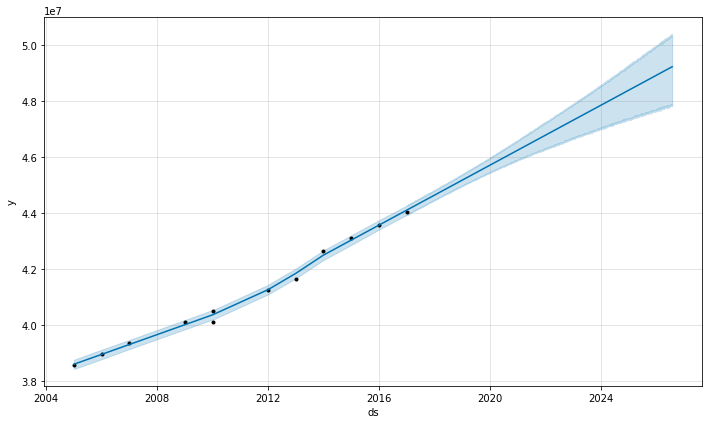

In [184]:
fig1 = m.plot(forecast)


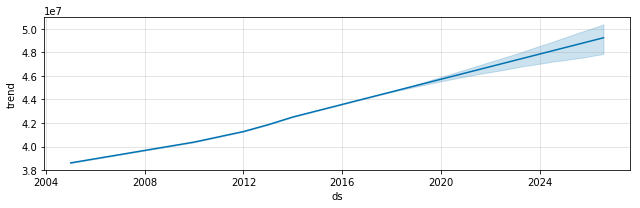

In [185]:
fig2 = m.plot_components(forecast)